# Money raised by startup

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv("startup_funding_Data _kaggle.csv")
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [118]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [119]:
df_new = df.drop(columns = ['Sr No', 'Date dd/mm/yyyy', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Remarks'])

In [120]:
df_new

,Startup Name,Amount in USD
0,BYJU’S,"20,00,00,000"
1,Shuttl,"80,48,394"
2,Mamaearth,"1,83,58,860"
3,https://www.wealthbucket.in/,"30,00,000"
4,Fashor,"18,00,000"
...,...,...
3039,Printvenue,"45,00,000"
3040,Graphene,"8,25,000"
3041,Mad Street Den,"15,00,000"
3042,Simplotel,NaN


In [121]:
df_new.dropna(inplace = True)

In [122]:
df_new["Startup Name"].value_counts() #checking names of most famous startups and looking for their names in diffrent forms

Swiggy                 8
Ola Cabs               7
Capital Float          5
UrbanClap              5
Toppr                  5
                      ..
Markets and Markets    1
Ixigo                  1
Haqdarshak             1
Airpay                 1
couponmachine.in       1
Name: Startup Name, Length: 1712, dtype: int64

In [123]:
for i in df_new["Startup Name"].value_counts().index: # checking more names of ola in the daraset
    if "Ola" in i:
        print(i)
    else:
        continue

Ola Cabs
Ola
Olacabs
Ola Electric


In [124]:
#replacing all the ola with single ola name 
df_new["Startup Name"].replace("Ola", "Ola Cabs", inplace = True)
df_new["Startup Name"].replace("Olacabs", "Ola Cabs", inplace = True)
df_new["Startup Name"].replace("Ola Electric", "Ola Cabs", inplace = True)


In [125]:
for i in df_new["Startup Name"].value_counts().index: #cheking for topper
    if "oppr" in i:
        print(i)
    else:
        continue

Toppr
Toppr.com


In [126]:
df_new["Startup Name"].replace("Toppr.com", "Toppr", inplace = True)   #replacing topper   

In [127]:
for i in df_new["Startup Name"].value_counts().index: #cheking for flipkart
    if "lipkart" in i:
        print(i)
    else:
        continue

Flipkart
Flipkart.com


In [128]:
df_new["Startup Name"].replace("Flipkart.com", "Flipkart", inplace = True)   #replacing flipkart

In [129]:
for i in df_new["Startup Name"].value_counts().index: #cheking for paytm
    if "aytm" in i:
        print(i)
    else:
        continue

Paytm
Paytm Marketplace


In [130]:
df_new["Startup Name"].replace("Paytm Marketplace", "Paytm", inplace = True)  #replacing paytm

In [142]:
array1 = []
array2 = []
for i in df_new["Startup Name"].value_counts().index:
    array1.append(i)
    
for i1 in df_new["Startup Name"].value_counts().values:
    array2.append(i1)
    
array1 = array1[0:5]
array2 = array2[0:5]
print(array1)
print(array2)

['Ola Cabs', 'Swiggy', 'Paytm', 'Toppr', 'Flipkart']
[13, 8, 6, 6, 6]


# doing operation for values in amount & dealing with incorrect entries

In [131]:
df_new["Amount in USD"].unique() #checking different type of values in the amount

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [132]:
#handling unkown data which can be seen above replacing them with nan 
arr = []
for i in df_new["Amount in USD"]:
    arr.append(i)

In [133]:
import numpy as np
arr2 = []
for i in arr:
    if "x" in i:
        arr2.append(np.nan)
        continue
    elif "+" in i:
        arr2.append(np.nan)
        continue
    elif "," in i:
        arr2.append(i)
        continue
    else :
        arr2.append(np.nan)
    

In [134]:
df_new["Amount"] = arr2
df_new.drop("Amount in USD", axis = 1, inplace = True)
df_new

,Startup Name,Amount
0,BYJU’S,"20,00,00,000"
1,Shuttl,"80,48,394"
2,Mamaearth,"1,83,58,860"
3,https://www.wealthbucket.in/,"30,00,000"
4,Fashor,"18,00,000"
...,...,...
3038,Grabhouse.com,"25,00,000"
3039,Printvenue,"45,00,000"
3040,Graphene,"8,25,000"
3041,Mad Street Den,"15,00,000"


In [135]:
df_new['Amount'] = df_new['Amount'].apply(lambda x: float(str(x).replace(",","")))  # converting string to float amount

In [136]:
df_new1 = df_new.groupby("Startup Name").sum(["Amount"])

In [139]:
df_new1 = df_new1.sort_values(by = "Amount", ascending = False) # sorting the added values
df_new1

,Amount
Startup Name,
Flipkart,4.759700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.348950e+09
Ola Cabs,2.054200e+09
Udaan,8.700000e+08
...,...
\\xc2\\xa0Notesgen,0.000000e+00
\\xc2\\xa0Satvacart,0.000000e+00
Mishry Reviews,0.000000e+00


In [152]:
arr1 = df_new1.index  # basic operation to take values in array to plot in matplotlib
arr2 = df_new1.values
arr1 = arr1[0:5]
arr2 = arr2[0:5]
arr3 = []

print(arr1)
for i11 in arr2:
    arr3.append(i11[0])
print(arr3)

Index(['Flipkart', 'Rapido Bike Taxi', 'Paytm', 'Ola Cabs', 'Udaan'], dtype='object', name='Startup Name')
[4759700000.0, 3900000000.0, 3348950000.0, 2054200000.0, 870000000.0]


Flipkart 4759700000.0
Rapido Bike Taxi 3900000000.0
Paytm 3348950000.0
Ola Cabs 2054200000.0
Udaan 870000000.0


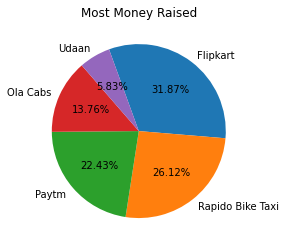

In [157]:
#plotting for most money raised by startup 
i = 0
while i < len(arr1):
    print(arr1[i], arr3[i])
    i = i + 1

plt.pie(arr3 , labels = arr1 , autopct='%0.2f%%', counterclock= False , startangle=110)
plt.title('Most Money Raised')
plt.show()

In [158]:
#plotting pie chart for no, of times money raised
# copying code from above
array1 = []
array2 = []
for i in df_new["Startup Name"].value_counts().index:
    array1.append(i)
    
for i1 in df_new["Startup Name"].value_counts().values:
    array2.append(i1)
    
array1 = array1[0:5]
array2 = array2[0:5]
print(array1)
print(array2)

['Ola Cabs', 'Swiggy', 'Paytm', 'Toppr', 'Flipkart']
[13, 8, 6, 6, 6]


Ola Cabs 13
Swiggy 8
Paytm 6
Toppr 6
Flipkart 6


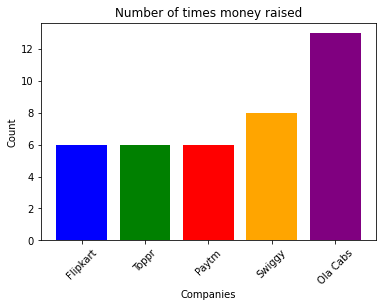

In [169]:
#plotting histogram for no. of times money raised.
#plotting now
i4 = 0
while i4 < len(array1):
    print(array1[i4], array2[i4])
    i4 = i4 + 1
    
    
arr1 = array1[::-1]
arr2 = array2[::-1]

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the histogram
ax.bar(arr1, arr2, color = ['blue', 'green', 'red', 'orange', 'purple'])

# Set labels and title
ax.set_xlabel('Companies')
ax.set_ylabel('Count')
ax.set_title('Number of times money raised')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



# we can see that maximum amount raised companies are different from no. of times amount raised companies.